In [1]:
from google.colab import files
uploaded = files.upload()



Saving cleaned_creditcard.csv to cleaned_creditcard.csv


Assignment 5 – Regression Analysis (Credit Card Dataset)
We applied Linear Regression to predict transaction amounts using features like V1–V5.
After training and testing the model, we evaluated it using:

Mean Absolute Error (MAE) → measures average prediction error.

Root Mean Squared Error (RMSE) → measures error magnitude.

The regression model gives us a baseline understanding of numeric relationships in the dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
data = pd.read_csv("cleaned_creditcard.csv")

# Show first few rows
display(data.head())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
3,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
4,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0


In [4]:
# Select independent variables (features)
X = data[['V1', 'V2', 'V3', 'V4', 'V5']]  # you can choose any numeric columns
# Target variable
y = data['Amount']


In [5]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (87855, 5)
Testing data shape: (21964, 5)


In [7]:
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [8]:
# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


✅ Model Evaluation:
Mean Absolute Error (MAE): 19.122728787492274
Root Mean Squared Error (RMSE): 25.822748927567922


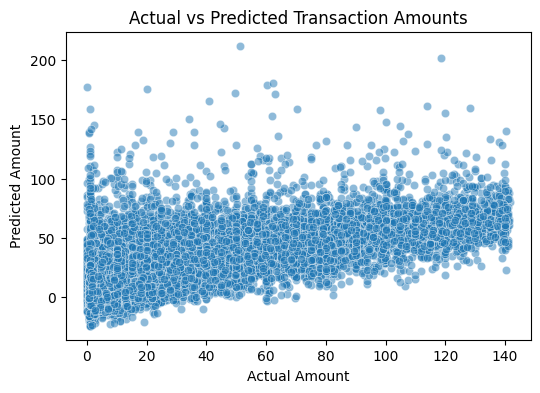

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Amount")
plt.ylabel("Predicted Amount")
plt.title("Actual vs Predicted Transaction Amounts")
plt.show()
